In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("D:/DataSets ML/tumorData/data.csv")

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data.drop([data.columns[0],data.columns[32]],axis =1, inplace =True)

In [5]:
data['diagnosis'].replace(to_replace= ['B','M'],value = [0,1],inplace =True)

In [6]:
training_data = data.iloc[0:int(0.7*len(data))]

In [7]:
cv_data = data.iloc[int(0.7*len(data)):int(0.9*len(data))]

In [8]:
testing_data = data.iloc[int(0.9*len(data)):]

In [9]:
C = training_data['diagnosis']

In [10]:
C = np.array(C).reshape(C.shape[0],1)

In [16]:
C.shape

(398, 1)

In [17]:
train_labels = np.array(training_data['diagnosis']).reshape(training_data['diagnosis'].shape[0],1)

In [18]:
train_labels.shape

(398, 1)

In [19]:
X= training_data.drop(['diagnosis'],inplace=False,axis=1)

In [20]:
X = (X - np.mean(X,axis= 0))/np.std(X,axis=0)
#it will convert it into zero mean one standard deviation so that gradient doesnt ovsershoot

X_transpose = np.array(training_data.drop(['diagnosis'],axis =1))
X_transpose.shape
X_transpose = (X_transpose - np.mean(X_transpose,axis =0))/np.std(X_transpose,axis =0)

In [21]:
N_train  = X.shape[1]
m=X.shape[1]

In [82]:
"""
used this in batch gradient descent
def P(theta0,theta,X):
    P_theta0_theta =  1/(1+ np.exp(-(theta0+np.matmul(X,theta)))) #got rank 1 matrix
    P_theta0_theta = P_theta0_theta.values.reshape(P_theta0_theta.shape[0],1) #converting it into rank 2 matrix
    return P_theta0_theta
    """
def Posterior(theta0,theta,X_transpose):
    discriminant_score = theta0 +np.matmul(X_transpose,theta)
    P_theta0_theta = 1/(1+ np.exp(-discriminant_score))
    return P_theta0_theta

In [41]:
""" 
used this in batch gradient descent
def neg_log_loss(C,P_theta0_theta):
    neg_log_loss_theta0_theta = -(np.matmul(C.T,np.log(P_theta0_theta))) +np.matmul((1-C).T,np.log(1-P_theta0_theta))
    return neg_log_loss_theta0_theta
    """
'''def neg_log_loss(train_labels,P_theta0_theta):
    lhs_sum = np.matmul(train_labels.T,np.log(P_theta0_theta))
    rhs_sum = np.matmul((1-train_labels).T,np.log(1-P_theta0_theta))
    neg_log_loss_theta0_theta = -(1/train_labels.shape[0])*(lhs_sum+rhs_sum)
    return neg_log_loss_theta0_theta
'''
#after regelarization
def neg_log_loss(train_labels,P_theta0_theta):
    lhs_sum = np.matmul(train_labels.T,np.log(P_theta0_theta))
    rhs_sum = np.matmul((1-train_labels).T,np.log(1-P_theta0_theta))
    neg_log_loss_theta0_theta = -(1/train_labels.shape[0])*(lhs_sum+rhs_sum)
    return neg_log_loss_theta0_theta

In [102]:
#it is called batch gradient descent
"""
theta0_initial = 0
theta_initial = np.zeros((m,1))
epsilon = 10**(-3)
tol = 10**(-4)

iterations = list()
neg_log_loss_history = list()
iteration_number = 0

while(True):
    
    P_initial =P(theta0_initial,theta_initial,X)
    
    theta0_final = theta0_initial - (epsilon*np.mean(P_initial - C))
    theta_final = theta_initial - ((1/N_train)*epsilon*np.matmul((P_initial -C).T,X).T)
    
    neg_log_loss_initial = neg_log_loss(C,P_initial)
    
    P_final = P(theta0_final,theta_final,X)
    
    neg_log_loss_final = neg_log_loss(C,P_final)
    
    if abs(neg_log_loss_initial - neg_log_loss_final)< tol:
        break
    
    theta0_initial = theta0_final
    theta_initial = theta_final
    
    iterations.append(iteration_number)
    neg_log_loss_history.append(neg_log_loss_initial)
    
    print("Iteration number - ", iteration_number, "Cross Entropy loss - ", neg_log_loss_initial)
    
    iteration_number = iteration_number+1
"""

# below one it is called mini batch gradient descent
# in Stochastic Gradient descent, mini batch size is 1
theta0_initial = 0
theta_initial = np.zeros((m,1))
epsilon = 10**(-3)
tol = 10**(-4)
mini_batch_size=2
time_steps = N_train//mini_batch_size


iterations = list()
neg_log_loss_history = list()
iteration_number = 0
epoc_counter = 0

while(True):
    
    
    for i in range(0,time_steps):
        rand_indices = np.random.choice(a = np.arange(0,N_train),size = mini_batch_size,replace=False)
        X_transpose_mini_batch = X_transpose[rand_indices]
        #X_transpose_mini_batch = X_transpose_mini_batch.reshape(-1,X_transpose_mini_batch.shape[0])
        train_labels_mini_batch = train_labels[rand_indices]
        #train_labels_mini_batch
        
        P_initial =Posterior(theta0_initial,theta_initial,X_transpose_mini_batch)

        theta0_final = theta0_initial - (epsilon*np.mean(P_initial - train_labels_mini_batch))
        theta_final = theta_initial - ((1/mini_batch_size)*epsilon*np.matmul((P_initial -train_labels_mini_batch).T,X_transpose_mini_batch).T)

        neg_log_loss_initial = neg_log_loss(train_labels_mini_batch,P_initial)

        P_final = Posterior(theta0_final,theta_final,X_transpose_mini_batch)

        neg_log_loss_final = neg_log_loss(train_labels_mini_batch,P_final)

        
        theta0_initial = theta0_final
        theta_initial = theta_final

        iterations.append(iteration_number)
        neg_log_loss_history.append(neg_log_loss_initial[0][0])

        print("Iteration number - ", iteration_number, "Cross Entropy loss - ", neg_log_loss_initial[0][0])

        iteration_number = iteration_number+1
        
    epoch_counter = epoch_counter+1
    
    print("End of epoch number", epoch_counter,"cross entropy loss = ",neg_log_loss_initial[0][0])
    
    if abs(neg_log_loss_initial - neg_log_loss_final) < tol:
        break

def fit(step_size,reg_strength):
    theta0_initial = 0
    theta_initial = np.zeros((m,1))
    epsilon = step_size
    tol = 10**(-4)
    mini_batch_size=2
    time_steps = N_train//mini_batch_size


    iterations = list()
    neg_log_loss_history = list()
    iteration_number = 0
    epoc_counter = 0
    invalid_value_flag = 0

    while(True):


        for i in range(0,time_steps):
            rand_indices = np.random.choice(a = np.arange(0,N_train),size = mini_batch_size,replace=False)
            X_transpose_mini_batch = X_transpose[rand_indices]
            #X_transpose_mini_batch = X_transpose_mini_batch.reshape(-1,X_transpose_mini_batch.shape[0])
            train_labels_mini_batch = train_labels[rand_indices]
            #train_labels_mini_batch

            P_initial =Posterior(theta0_initial,theta_initial,X_transpose_mini_batch)

            theta0_final = theta0_initial - (epsilon*np.mean(P_initial - train_labels_mini_batch))
            theta_final = theta_initial - ((1/mini_batch_size)*epsilon*np.matmul((P_initial -train_labels_mini_batch).T,X_transpose_mini_batch).T)

            neg_log_loss_initial = neg_log_loss(train_labels_mini_batch,P_initial, theta_initial, reg_strength)

            P_final = Posterior(theta0_final,theta_final,X_transpose_mini_batch)

            neg_log_loss_final = neg_log_loss(train_labels_mini_batch,P_final,theta_final, reg_strength)
            
            if np.isnan(neg_log_loss_final[0][0]) == True:
                invalid_value_flag = 1
                break
                
            theta0_initial = theta0_final
            theta_initial = theta_final

            iterations.append(iteration_number)
            neg_log_loss_history.append(neg_log_loss_initial[0][0])

            print("Iteration number - ", iteration_number, "Cross Entropy loss - ", neg_log_loss_initial[0][0])

            iteration_number = iteration_number+1

        epoch_counter = epoch_counter+1

        print("End of epoch number", epoch_counter,"cross entropy loss = ",neg_log_loss_initial[0][0])

        if abs(neg_log_loss_initial - neg_log_loss_final) < tol or invalid_value_flag == 1:
            break

In [104]:
def compute_accuracy(theta0,theta,X_transpose_labels) : 
    P_mini_batch = Posterior(theta0,theta,X_transpose)
    Predicted_labels = P_mini_batch>0.5
    accuracy = np.count_nonzero(Predicted_labels == labels)/labels.shape[0]
    return accuracy

grid_search_results = list()
for step_size in [0.001,0.01]:
    for reg_hyp_param in [0.0001,0.001,0.01,0.1,1,10,100]:
        grid_search_results.append(fit(step_size,reg_hyp_param))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9260\4120031933.py", line 10, in <module>
    grid_search_results.append(fit(step_size,reg_hyp_param))
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9260\4034047251.py", line 120, in fit
    theta_final = theta_initial - ((1/mini_batch_size)*epsilon*np.matmul((P_initial -train_labels_mini_batch).T,X_transpose_mini_batch).T)
                                                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\generic.py", line 2016, in __array_ufunc__
    return arraylike.array_ufunc(self, ufunc, method, *inputs, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [105]:
grid_search_cv_results = dict()
for configs in grid_search_results:
    grid_search_cv_results[tuple(configs.keys())] = compute_accuracy(list(configs.values())[0][0],
                                                                    list(configs.values())[0][1],
                                                                     X_cv_transpose,cv_labels
                                                                    )

In [46]:
theta_final

array([[ 0.11633784],
       [ 0.08942636],
       [ 0.11930624],
       [ 0.10525554],
       [ 0.06158533],
       [ 0.11125938],
       [ 0.10043878],
       [ 0.12608506],
       [ 0.05928491],
       [ 0.02992055],
       [ 0.08841461],
       [-0.01355317],
       [ 0.08972825],
       [ 0.07817057],
       [-0.02807325],
       [ 0.04207264],
       [ 0.02276156],
       [ 0.06781886],
       [-0.0214928 ],
       [ 0.03192627],
       [ 0.14033287],
       [ 0.11599311],
       [ 0.14414587],
       [ 0.12658993],
       [ 0.09086682],
       [ 0.13130302],
       [ 0.11211177],
       [ 0.16357462],
       [ 0.10748125],
       [ 0.12944173]])

In [72]:
cv_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
398,0,11.06,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,0.1535,...,12.68,20.35,80.79,496.7,0.11200,0.1879,0.2079,0.05556,0.2590,0.09158
399,0,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.016380,0.1847,...,13.45,24.49,86.00,562.0,0.12440,0.1726,0.1449,0.05356,0.2779,0.08121
400,1,17.91,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.119800,0.2113,...,20.80,27.78,149.60,1304.0,0.18730,0.5917,0.9034,0.19640,0.3245,0.11980
401,0,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.017960,0.1601,...,13.80,20.14,87.64,589.5,0.13740,0.1575,0.1514,0.06876,0.2460,0.07262
402,0,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.018830,0.1874,...,14.13,24.61,96.31,621.9,0.09329,0.2318,0.1604,0.06608,0.3207,0.07247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0,11.06,17.12,71.25,366.5,0.11940,0.10710,0.04063,0.042680,0.1954,...,11.69,20.74,76.08,411.1,0.16620,0.2031,0.1256,0.09514,0.2780,0.11680
508,0,16.30,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.045630,0.1711,...,17.32,17.76,109.80,928.2,0.13540,0.1361,0.1947,0.13570,0.2300,0.07230
509,1,15.46,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.085200,0.1807,...,17.11,36.33,117.70,909.4,0.17320,0.4967,0.5911,0.21630,0.3013,0.10670
510,0,11.74,14.69,76.31,426.0,0.08099,0.09661,0.06726,0.026390,0.1499,...,12.45,17.60,81.25,473.8,0.10730,0.2793,0.2690,0.10560,0.2604,0.09879


In [73]:
cv_gt_labels = np.array(cv_data['diagnosis']).reshape(cv_data.shape[0],1)

In [74]:
cv_data.drop(['diagnosis'],axis =1, inplace =True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9260\1585920398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_data.drop(['diagnosis'],axis =1, inplace =True)


In [75]:
cv_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
398,11.06,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,0.1535,0.06214,...,12.68,20.35,80.79,496.7,0.11200,0.1879,0.2079,0.05556,0.2590,0.09158
399,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.016380,0.1847,0.06019,...,13.45,24.49,86.00,562.0,0.12440,0.1726,0.1449,0.05356,0.2779,0.08121
400,17.91,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.119800,0.2113,0.07115,...,20.80,27.78,149.60,1304.0,0.18730,0.5917,0.9034,0.19640,0.3245,0.11980
401,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.017960,0.1601,0.05541,...,13.80,20.14,87.64,589.5,0.13740,0.1575,0.1514,0.06876,0.2460,0.07262
402,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.018830,0.1874,0.05899,...,14.13,24.61,96.31,621.9,0.09329,0.2318,0.1604,0.06608,0.3207,0.07247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,11.06,17.12,71.25,366.5,0.11940,0.10710,0.04063,0.042680,0.1954,0.07976,...,11.69,20.74,76.08,411.1,0.16620,0.2031,0.1256,0.09514,0.2780,0.11680
508,16.30,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.045630,0.1711,0.05657,...,17.32,17.76,109.80,928.2,0.13540,0.1361,0.1947,0.13570,0.2300,0.07230
509,15.46,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.085200,0.1807,0.07083,...,17.11,36.33,117.70,909.4,0.17320,0.4967,0.5911,0.21630,0.3013,0.10670
510,11.74,14.69,76.31,426.0,0.08099,0.09661,0.06726,0.026390,0.1499,0.06758,...,12.45,17.60,81.25,473.8,0.10730,0.2793,0.2690,0.10560,0.2604,0.09879


In [76]:
X_cv_data = np.array(cv_data)

In [77]:
X_cv_data = (X_cv_data - np.mean(X_cv_data,axis=0))/np.std(X_cv_data,axis=0)

In [90]:
theta_final = theta_final.T
X_cv_data =X_cv_data.T
X_cv_data.shape

(30, 114)

In [100]:
cv_pred = Posterior(theta0_final,theta_final,X_cv_data)
cv_pred

array([[0.17671207],
       [0.26601289],
       [0.98836305],
       [0.18767243],
       [0.33568448],
       [0.32805234],
       [0.12601729],
       [0.26113432],
       [0.4892713 ],
       [0.36397734],
       [0.91162361],
       [0.35944306],
       [0.29581517],
       [0.25826199],
       [0.14423512],
       [0.70332242],
       [0.51187142],
       [0.35503327],
       [0.22352703],
       [0.97730873],
       [0.25084885],
       [0.19646722],
       [0.34353521],
       [0.77829575],
       [0.37570703],
       [0.60789352],
       [0.2884602 ],
       [0.10965905],
       [0.41466123],
       [0.31992739],
       [0.09566003],
       [0.12973121],
       [0.9715127 ],
       [0.45098089],
       [0.95843656],
       [0.95044184],
       [0.32328675],
       [0.80190861],
       [0.3403493 ],
       [0.31299056],
       [0.27202834],
       [0.20492424],
       [0.57268461],
       [0.88637509],
       [0.16391522],
       [0.11917901],
       [0.78788006],
       [0.453

In [92]:
cv_pred = cv_pred>0.5

In [99]:
cv_pred.shape[0]['True']

TypeError: 'int' object is not subscriptable

In [94]:
accuracy = np.count_nonzero(cv_pred == cv_gt_labels)

In [95]:
accuracy

0

In [60]:
percent_accuracy = accuracy/X_cv_data.shape[0]

In [61]:
percent_accuracy #above code method is batch gradient descent and in this accuracu, decision boundary comes same almost

0.0

In [35]:
len(iterations)

5942

In [36]:
import matplotlib.pyplot as plt

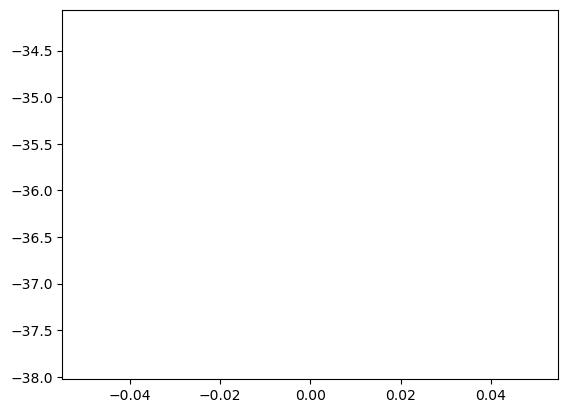

In [40]:
plt.plot(iterations[0],neg_log_loss_history[0])

In [ ]:
"""
#it is called mini batch gradient descent
theta0_initial = 0
theta_initial = np.zeros((m,1))
epsilon = 10**(-3)
tol = 10**(-4)
mini_batch_size=2
time_steps = N_train//mini_batch_size


iterations = list()
neg_log_loss_history = list()
iteration_number = 0
epoc_counter = 0

while(True):
    
    
    for i in range(0,time_steps):
        rand_indices = np.random.choice(a = np.arange(0,N_train),size = mini_batch_size,replace=False)
        X_transpose_mini_batch = X_transpose[rand_indices]
        train_labels_mini_batch = train_labels[rand_indices]
        
        P_initial =P(theta0_initial,theta_initial,X_transpose_mini_batch)

        theta0_final = theta0_initial - (epsilon*np.mean(P_initial - train_labels_mini_batch))
        theta_final = theta_initial - ((1/N_train)*epsilon*np.matmul((P_initial -train_labels_mini_batch).T,X_transpose_mini_batch).T)

        neg_log_loss_initial = neg_log_loss(train_labels_mini_batch,P_initial)

        P_final = P(theta0_final,theta_final,X_transpose_mini_batch)

        neg_log_loss_final = neg_log_loss(train_labels_mini_batch,P_final)

        
        theta0_initial = theta0_final
        theta_initial = theta_final

        iterations.append(iteration_number)
        neg_log_loss_history.append(neg_log_loss_initial[0][0])

        print("Iteration number - ", iteration_number, "Cross Entropy loss - ", neg_log_loss_initial[0][0])

        iteration_number = iteration_number+1
        
    epoch_counter = epoch_counter+1
    
    print("End of epoch number", epoch_counter,"cross entropy loss = ",neg_log_loss_initial[0][0])
    
    if abs(neg_log_loss_initial - neg_log_loss_final) < tol:
        break
    
"""